C:\Users\somondal\AppData\Local\Temp\ipykernel_2688\1818892147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Classification'].iloc[mt]= 'Agg_Up'
C:\Users\somondal\AppData\Local\Temp\ipykernel_2688\1818892147.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Agg_Up' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data1['Classification'].iloc[mt]= 'Agg_Up'


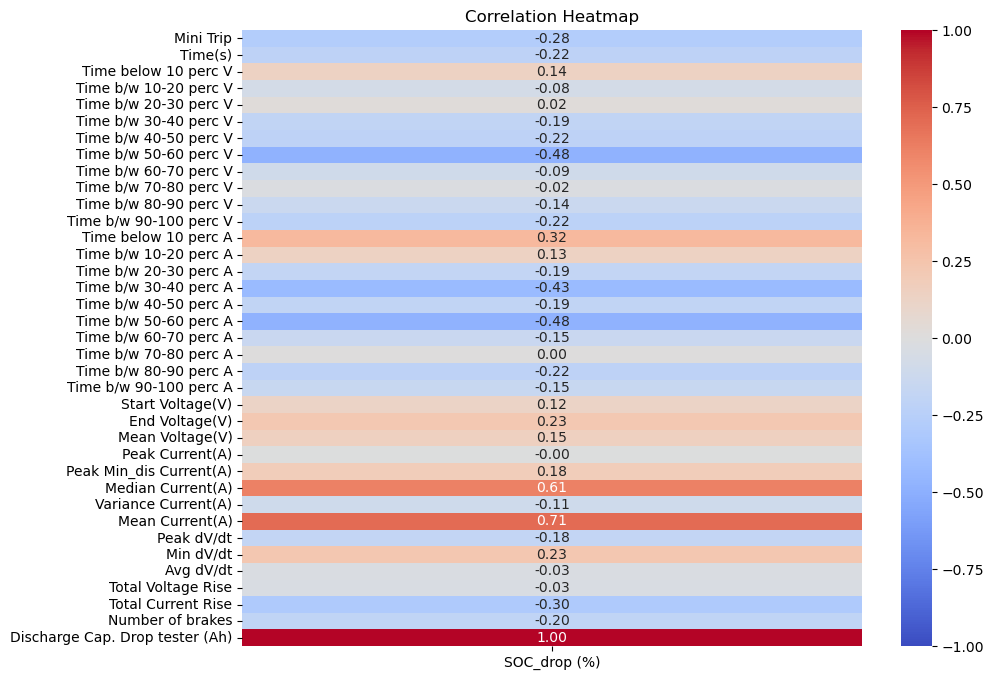

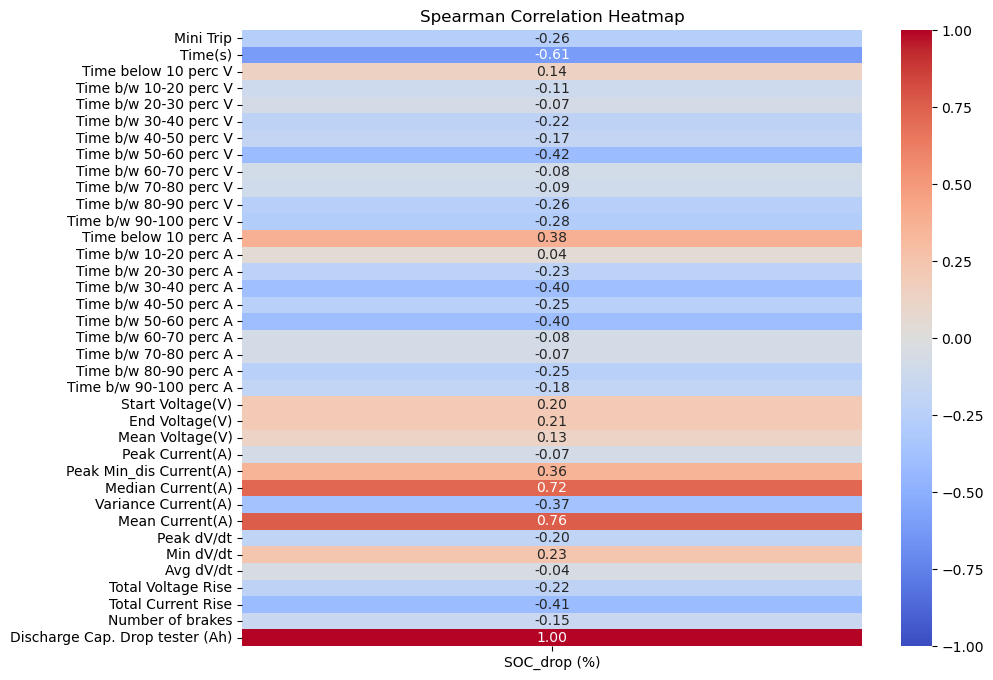

NameError: name 'data2' is not defined

NameError: name 'data2' is not defined

NameError: name 'data2' is not defined

In [1]:
%run Cut_data.ipynb

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
info_data_3= info_data_2.copy()
arr_add= np.array(data1['Classification'].values)
info_data_3['Classification']= arr_add

In [4]:
def ml_classify(df):
    X = df.drop(['Mini Trip', 'Classification'], axis=1)
    y = df['Classification']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    cv_scores = cross_val_score(clf, X, y, cv=10)  
    mean_accuracy = np.mean(cv_scores)
    std_accuracy = np.std(cv_scores)

    print ("Mean Acc:", mean_accuracy)
    print ("Std Acc:", std_accuracy)
    
    y_pred = clf.predict(X_test)
    data_pred=(classification_report(y_test, y_pred))
    report_lines = data_pred.strip().split('\n')
    accuracy_line = report_lines[-3]
    accuracy_tokens = accuracy_line.strip().split()
    accuracy = float(accuracy_tokens[-2])
    print (data_pred)
    return accuracy, std_accuracy

In [5]:
ml_classify(info_data_3)

Mean Acc: 0.7633333333333334
Std Acc: 0.11547539955001052
              precision    recall  f1-score   support

    Agg_Down       0.43      0.75      0.55         4
    Agg_Flat       1.00      0.67      0.80         3
      Agg_Up       1.00      1.00      1.00         2
   Norm_Down       0.75      0.60      0.67         5
   Norm_Flat       1.00      0.67      0.80         3
     Norm_Up       1.00      1.00      1.00         3

    accuracy                           0.75        20
   macro avg       0.86      0.78      0.80        20
weighted avg       0.82      0.75      0.77        20



(0.75, 0.11547539955001052)

In [6]:
def choose_cut_time(t):
    cut_dict={}
    data_list=[]
    for key in dict.keys():
        datafr= cut_time(dict[key], t)  ##Function to select the time limit till what we want to cut down the data to
        data_list.append(datafr)
    cut_dict={f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list)}
    cut_data= features_ext(cut_dict)
    cut_data_2 = cut_data.copy()
    cut_data_2['Classification']= arr_add
    return cut_data_2

In [7]:
def accuracy_finding():
    time_arr=[]
    acc_arr=[]
    st_arr=[]
    for times in range (300, 801, 50):
        data_needed= choose_cut_time(times)
        print (f'For time span of {times} second of data:')
        acc, st= ml_classify(data_needed)
        print ('------------------------------------------------------')
        time_arr.append(times)
        acc_arr.append(acc)
        st_arr.append(st)
    return time_arr, acc_arr, st_arr

In [8]:
x_val, acc, st= accuracy_finding()

For time span of 300 second of data:
Mean Acc: 0.5622222222222222
Std Acc: 0.14775689075448256
              precision    recall  f1-score   support

    Agg_Down       0.43      0.75      0.55         4
    Agg_Flat       0.67      0.67      0.67         3
      Agg_Up       0.33      0.50      0.40         2
   Norm_Down       0.50      0.20      0.29         5
   Norm_Flat       0.67      0.67      0.67         3
     Norm_Up       0.50      0.33      0.40         3

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.49        20
weighted avg       0.52      0.50      0.48        20

------------------------------------------------------
For time span of 350 second of data:
Mean Acc: 0.44333333333333336
Std Acc: 0.1654361985856455
              precision    recall  f1-score   support

    Agg_Down       0.50      0.50      0.50         4
    Agg_Flat       0.60      1.00      0.75         3
      Agg_Up       0.00      0.00      0.00      

C:\Users\somondal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somondal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somondal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For time span of 500 second of data:
Mean Acc: 0.5933333333333334
Std Acc: 0.16496913291526633
              precision    recall  f1-score   support

    Agg_Down       0.67      1.00      0.80         4
    Agg_Flat       0.00      0.00      0.00         3
      Agg_Up       0.67      1.00      0.80         2
   Norm_Down       1.00      0.80      0.89         5
   Norm_Flat       0.50      0.67      0.57         3
     Norm_Up       1.00      0.67      0.80         3

    accuracy                           0.70        20
   macro avg       0.64      0.69      0.64        20
weighted avg       0.68      0.70      0.67        20

------------------------------------------------------
For time span of 550 second of data:
Mean Acc: 0.5622222222222222
Std Acc: 0.18265531189364018
              precision    recall  f1-score   support

    Agg_Down       0.67      0.50      0.57         4
    Agg_Flat       0.33      0.67      0.44         3
      Agg_Up       0.67      1.00      0.80      

C:\Users\somondal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somondal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somondal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For time span of 750 second of data:
Mean Acc: 0.7944444444444444
Std Acc: 0.15446043082730937
              precision    recall  f1-score   support

    Agg_Down       1.00      0.50      0.67         4
    Agg_Flat       0.67      0.67      0.67         3
      Agg_Up       1.00      1.00      1.00         2
   Norm_Down       0.83      1.00      0.91         5
   Norm_Flat       0.75      1.00      0.86         3
     Norm_Up       1.00      1.00      1.00         3

    accuracy                           0.85        20
   macro avg       0.88      0.86      0.85        20
weighted avg       0.87      0.85      0.84        20

------------------------------------------------------
For time span of 800 second of data:
Mean Acc: 0.7255555555555556
Std Acc: 0.12343339284462615
              precision    recall  f1-score   support

    Agg_Down       0.43      0.75      0.55         4
    Agg_Flat       1.00      0.33      0.50         3
      Agg_Up       0.67      1.00      0.80      

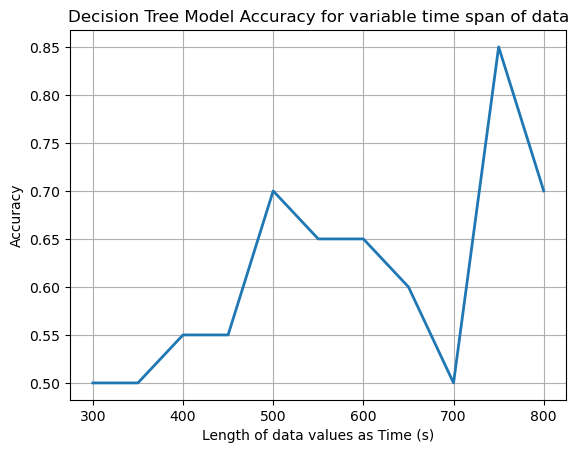

In [9]:
plt.figure()
plt.plot (x_val, acc, linewidth= 2)
plt.xlabel('Length of data values as Time (s)')
plt.ylabel('Accuracy')
plt.title ('Decision Tree Model Accuracy for variable time span of data')
plt.grid()
plt.show()

In [143]:
def ml_classify_gridsearch(df):
    X = df.drop(['Mini Trip', 'Classification'], axis=1)
    y = df['Classification']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 25],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8, 10, 12],
    'max_features': ['sqrt', 'log2', None]
    }
    clf = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    best_clf.fit(X_train, y_train)
    y_pred = best_clf.predict(X_test)
    
    data_pred = classification_report(y_test, y_pred)
    accuracy = grid_search.best_score_  
    print(data_pred)
    return accuracy

In [145]:
def accuracy_finding_gs():
    time_arr=[]
    acc_arr=[]
    for times in range (300, 801, 50):
        data_needed= choose_cut_time(times)
        print (f'For time span of {times} second of data:')
        acc= ml_classify_gridsearch(data_needed)
        print ('------------------------------------------------------')
        time_arr.append(times)
        acc_arr.append(acc)
    return time_arr, acc_arr
x_val_gs, acc_gs= accuracy_finding_gs()

For time span of 300 second of data:
              precision    recall  f1-score   support

    Agg_Down       0.43      0.75      0.55         4
    Agg_Flat       0.67      0.67      0.67         3
      Agg_Up       0.67      1.00      0.80         2
   Norm_Down       0.50      0.20      0.29         5
   Norm_Flat       0.67      0.67      0.67         3
     Norm_Up       1.00      0.67      0.80         3

    accuracy                           0.60        20
   macro avg       0.65      0.66      0.63        20
weighted avg       0.63      0.60      0.58        20

------------------------------------------------------
For time span of 350 second of data:
              precision    recall  f1-score   support

    Agg_Down       0.00      0.00      0.00         4
    Agg_Flat       0.50      1.00      0.67         3
      Agg_Up       0.00      0.00      0.00         2
   Norm_Down       0.33      0.20      0.25         5
   Norm_Flat       0.75      1.00      0.86         3
   

C:\Users\somondal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somondal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somondal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Agg_Down       0.50      0.75      0.60         4
    Agg_Flat       0.40      0.67      0.50         3
      Agg_Up       1.00      1.00      1.00         2
   Norm_Down       1.00      0.60      0.75         5
   Norm_Flat       0.00      0.00      0.00         3
     Norm_Up       0.75      1.00      0.86         3

    accuracy                           0.65        20
   macro avg       0.61      0.67      0.62        20
weighted avg       0.62      0.65      0.61        20

------------------------------------------------------
For time span of 500 second of data:
              precision    recall  f1-score   support

    Agg_Down       0.43      0.75      0.55         4
    Agg_Flat       0.50      0.67      0.57         3
      Agg_Up       1.00      1.00      1.00         2
   Norm_Down       0.50      0.20      0.29         5
   Norm_Flat       1.00      0.33      0.50         3
     Norm_Up       0.75      1.00      0

C:\Users\somondal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somondal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somondal\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


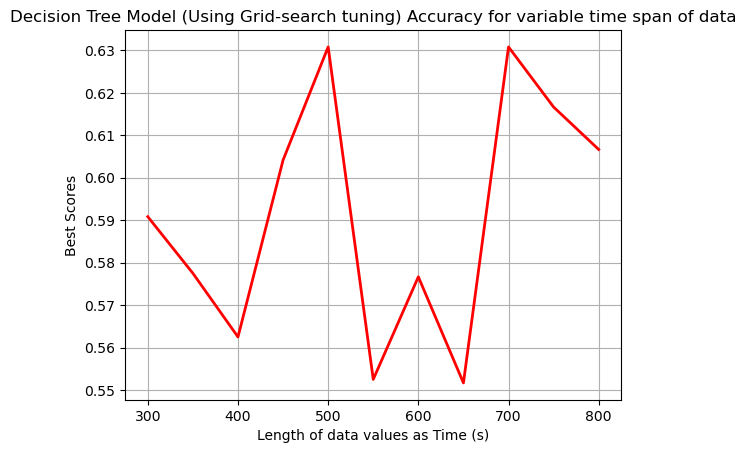

In [146]:
plt.figure()
plt.plot (x_val_gs, acc_gs, color='r', linewidth= 2)
plt.xlabel('Length of data values as Time (s)')
plt.ylabel('Best Scores')
plt.title ('Decision Tree Model (Using Grid-search tuning) Accuracy for variable time span of data')
plt.grid()
plt.show()

In [10]:
def ml_classify_rf(df):
    X = df.drop(['Mini Trip', 'Classification'], axis=1)
    y = df['Classification']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    cv_scores = cross_val_score(clf, X, y, cv=10)  
    mean_accuracy = np.mean(cv_scores)
    std_accuracy = np.std(cv_scores)

    print ("Mean Acc:", mean_accuracy)
    print ("Std Acc:", std_accuracy)
    
    y_pred = clf.predict(X_test)
    data_pred = classification_report(y_test, y_pred)
    report_lines = data_pred.strip().split('\n')
    accuracy_line = report_lines[-3]
    accuracy_tokens = accuracy_line.strip().split()
    accuracy = float(accuracy_tokens[-2])
    print(data_pred)
    return accuracy, std_accuracy
def accuracy_finding_rf():
    time_arr=[]
    acc_arr=[]
    st_arr=[]
    for times in range (300, 801, 50):
        data_needed= choose_cut_time(times)
        print (f'For time span of {times} second of data:')
        acc, st= ml_classify_rf(data_needed)
        print ('------------------------------------------------------')
        time_arr.append(times)
        acc_arr.append(acc)
        st_arr.append(st)
    return time_arr, acc_arr, st_arr
x_val_rf, acc_rf, st_rf= accuracy_finding_rf()

For time span of 300 second of data:
Mean Acc: 0.5922222222222222
Std Acc: 0.10098893717679557
              precision    recall  f1-score   support

    Agg_Down       1.00      0.50      0.67         4
    Agg_Flat       0.50      1.00      0.67         3
      Agg_Up       0.33      0.50      0.40         2
   Norm_Down       0.75      0.60      0.67         5
   Norm_Flat       0.67      0.67      0.67         3
     Norm_Up       0.50      0.33      0.40         3

    accuracy                           0.60        20
   macro avg       0.62      0.60      0.58        20
weighted avg       0.67      0.60      0.60        20

------------------------------------------------------
For time span of 350 second of data:
Mean Acc: 0.5866666666666667
Std Acc: 0.22508160385749373
              precision    recall  f1-score   support

    Agg_Down       0.67      0.50      0.57         4
    Agg_Flat       0.50      1.00      0.67         3
      Agg_Up       0.33      0.50      0.40      

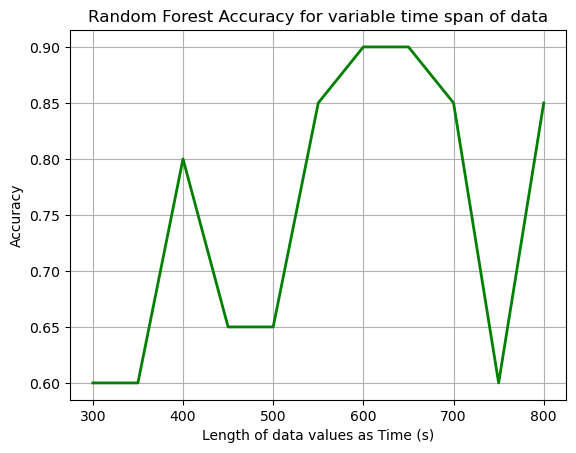

In [11]:
plt.figure()
plt.plot (x_val_rf, acc_rf, color='g', linewidth= 2)
plt.xlabel('Length of data values as Time (s)')
plt.ylabel('Accuracy')
plt.title ('Random Forest Accuracy for variable time span of data')
plt.grid()
plt.show()

In [ ]:
def ml_classify_svm(df):
    X = df.drop(['Mini Trip', 'Classification'], axis=1)
    y = df['Classification']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm_classifier = SVC(kernel='linear', random_state=42)
    svm_classifier.fit(X_train, y_train)

    cv_scores = cross_val_score(svm_classifier, X, y, cv=10)  
    mean_accuracy = np.mean(cv_scores)
    std_accuracy = np.std(cv_scores)

    print ("Mean Acc:", mean_accuracy)
    print ("Std Acc:", std_accuracy)

    y_pred = svm_classifier.predict(X_test)
    data_pred = classification_report(y_test, y_pred)
    report_lines = data_pred.strip().split('\n')
    accuracy_line = report_lines[-3]
    accuracy_tokens = accuracy_line.strip().split()
    accuracy = float(accuracy_tokens[-2])
    print(data_pred)
    return accuracy, std_accuracy
def accuracy_finding_svm():
    time_arr=[]
    acc_arr=[]
    st_arr=[]
    for times in range (300, 801, 50):
        data_needed= choose_cut_time(times)
        print (f'For time span of {times} second of data:')
        acc, st= ml_classify_svm(data_needed)
        print ('------------------------------------------------------')
        time_arr.append(times)
        acc_arr.append(acc)
        st_arr.append(st)
    return time_arr, acc_arr, st_arr
x_val_svm, acc_svm, st_svm= accuracy_finding_svm()

For time span of 300 second of data:


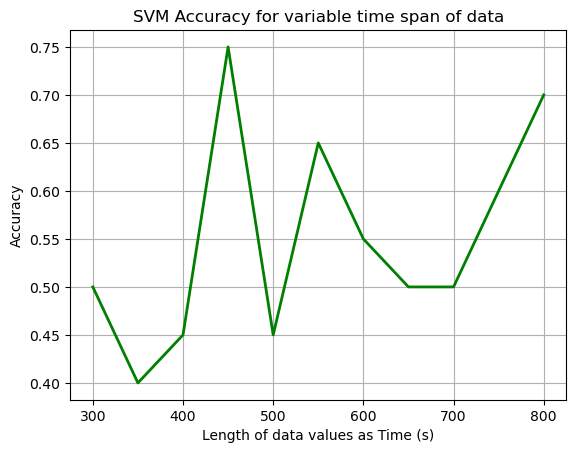

In [150]:
plt.figure()
plt.plot (x_val_svm, acc_svm, color='g', linewidth= 2)
plt.xlabel('Length of data values as Time (s)')
plt.ylabel('Accuracy')
plt.title ('SVM Accuracy for variable time span of data')
plt.grid()
plt.show()

In [12]:
def ml_classify_gbm(df):
    X = df.drop(['Mini Trip', 'Classification'], axis=1)
    y = df['Classification']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    gbm = GradientBoostingClassifier(n_estimators=100, learning_rate= 0.1, random_state= 42)
    gbm.fit(X_train, y_train)
    
    cv_scores = cross_val_score(gbm, X, y, cv=10)  
    mean_accuracy = np.mean(cv_scores)
    std_accuracy = (np.std(cv_scores))
    
    print ("Mean Acc:", mean_accuracy)
    print ("Std Acc:", std_accuracy)
    
    y_pred = gbm.predict(X_test)
    data_pred = classification_report(y_test, y_pred)
    report_lines = data_pred.strip().split('\n')
    accuracy_line = report_lines[-3]
    accuracy_tokens = accuracy_line.strip().split()
    accuracy = float(accuracy_tokens[-2])
    print(data_pred)
    return accuracy, std_accuracy
def accuracy_finding_gbm():
    time_arr=[]
    acc_arr=[]
    st_arr=[]
    for times in range (300, 801, 50):
        data_needed= choose_cut_time(times)
        print (f'For time span of {times} second of data:')
        acc, st= ml_classify_gbm(data_needed)
        print ('------------------------------------------------------')
        time_arr.append(times)
        acc_arr.append(acc)
        st_arr.append(st)
    return time_arr, acc_arr, st_arr
x_val_gbm, acc_gbm, st_gbm= accuracy_finding_gbm()

For time span of 300 second of data:
Mean Acc: 0.5322222222222223
Std Acc: 0.14877690647823866
              precision    recall  f1-score   support

    Agg_Down       1.00      0.25      0.40         4
    Agg_Flat       0.33      0.67      0.44         3
      Agg_Up       0.33      0.50      0.40         2
   Norm_Down       0.75      0.60      0.67         5
   Norm_Flat       0.50      0.67      0.57         3
     Norm_Up       0.50      0.33      0.40         3

    accuracy                           0.50        20
   macro avg       0.57      0.50      0.48        20
weighted avg       0.62      0.50      0.50        20

------------------------------------------------------
For time span of 350 second of data:
Mean Acc: 0.5155555555555555
Std Acc: 0.18129847159441015
              precision    recall  f1-score   support

    Agg_Down       0.33      0.50      0.40         4
    Agg_Flat       0.33      0.67      0.44         3
      Agg_Up       0.00      0.00      0.00      

In [28]:
y_arr= [acc, acc_rf, acc_gbm]  ##acc_svm
e_arr= [st, st_rf, st_gbm]

[0.14775689075448256, 0.1654361985856455, 0.1332823976782538, 0.15181616563511327, 0.16496913291526633, 0.18265531189364018, 0.11774108443089423, 0.0936304793679209, 0.11357816691600549, 0.15446043082730937, 0.12343339284462615]
[0.10098893717679557, 0.22508160385749373, 0.10100727268767565, 0.14452988925785865, 0.1257078722109418, 0.14109361221333658, 0.08986272109153669, 0.15235193176035253, 0.1354279909794897, 0.1568241918853524, 0.15652475842498528]
[0.14877690647823866, 0.18129847159441015, 0.11472457624703489, 0.20173629039961433, 0.167143761585759, 0.08177053107988487, 0.15876063199548227, 0.15462020374908128, 0.12933352424575445, 0.1726196132083418, 0.09893881386437221]


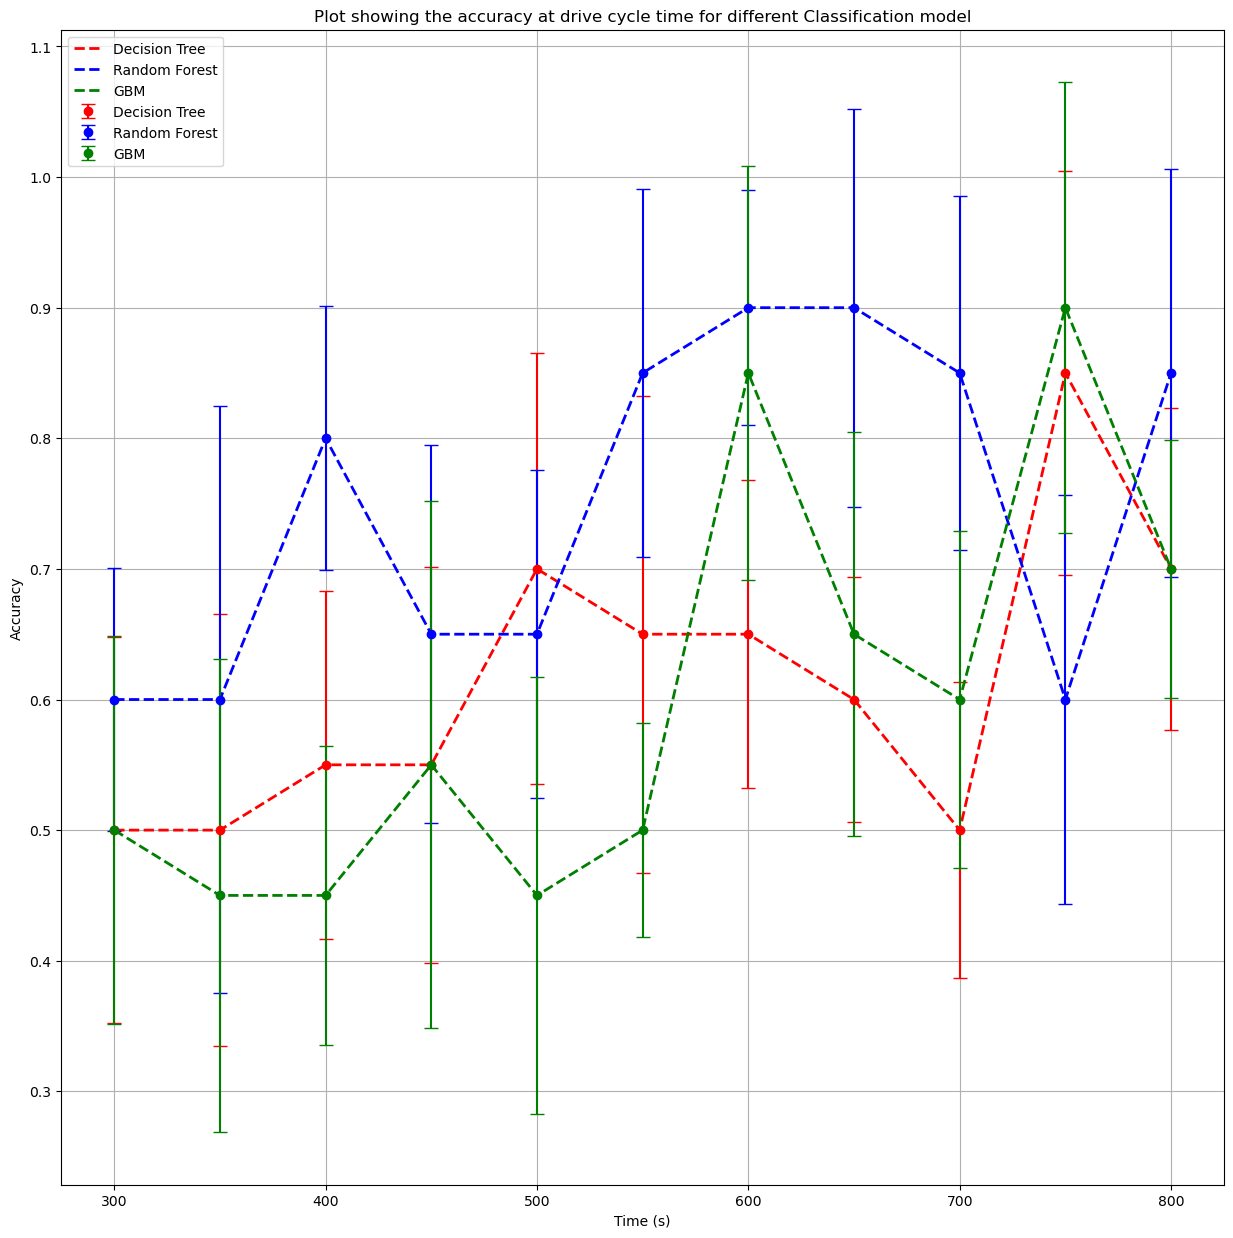

In [31]:
plt.figure(figsize=(15, 15))
x_values = np.arange(300, 801, 50)
ml_mod= ['Decision Tree', 'Random Forest', 'GBM']
colr= ['r', 'b', 'g']
for iii, values in enumerate(y_arr):
    plt.plot(x_values, values, linestyle='--', color= colr[iii], linewidth= 2, label= ml_mod[iii])
    print (e_arr[iii])
    ##plt.scatter(x_values, values)
    plt.errorbar(x_values, values, yerr= e_arr[iii], fmt='o', linestyle='none', color=colr[iii], label=ml_mod[iii], capsize=5)
plt.xlabel('Time (s)')
plt.ylabel('Accuracy')
plt.title('Plot showing the accuracy at drive cycle time for different Classification model')
##plt.xticks(x_values + (len(y_arr) * 5), x_values)
plt.legend()
plt.grid()
##plt.savefig('ML_plot_classification.png')
plt.show()

[0.14775689075448256, 0.1654361985856455, 0.1332823976782538, 0.15181616563511327, 0.16496913291526633, 0.18265531189364018, 0.11774108443089423, 0.0936304793679209, 0.11357816691600549, 0.15446043082730937, 0.12343339284462615]


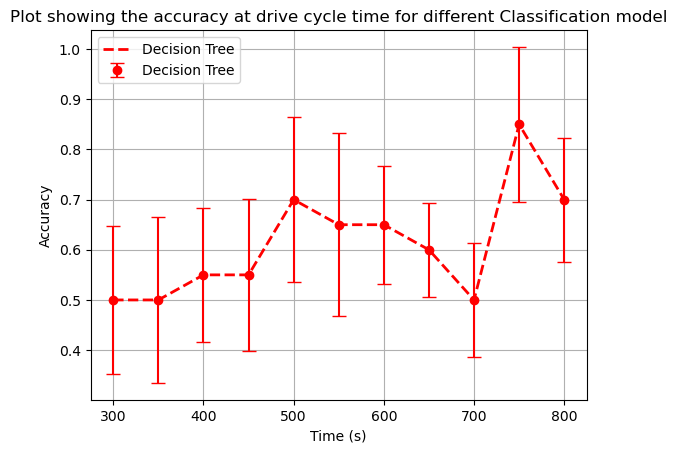

[0.10098893717679557, 0.22508160385749373, 0.10100727268767565, 0.14452988925785865, 0.1257078722109418, 0.14109361221333658, 0.08986272109153669, 0.15235193176035253, 0.1354279909794897, 0.1568241918853524, 0.15652475842498528]


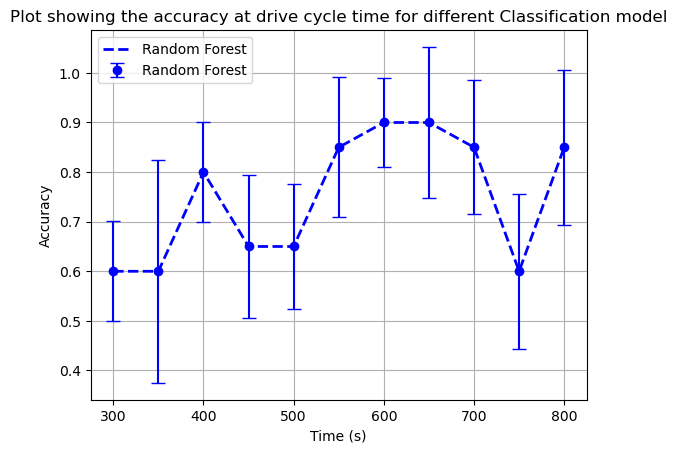

[0.14877690647823866, 0.18129847159441015, 0.11472457624703489, 0.20173629039961433, 0.167143761585759, 0.08177053107988487, 0.15876063199548227, 0.15462020374908128, 0.12933352424575445, 0.1726196132083418, 0.09893881386437221]


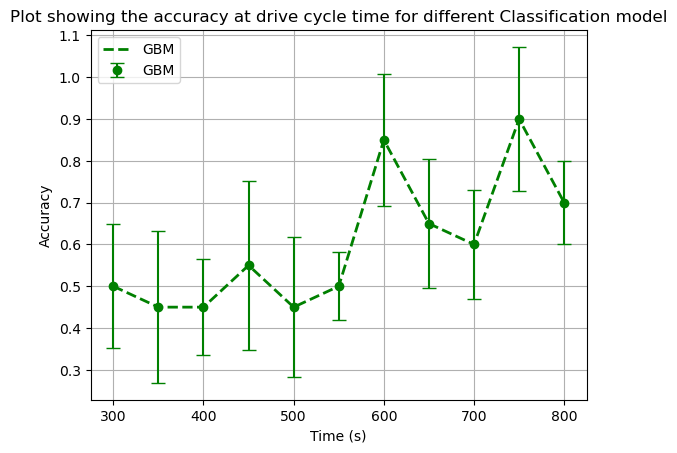

In [32]:
##plt.figure(figsize=(15, 15))
x_values = np.arange(300, 801, 50)
ml_mod= ['Decision Tree', 'Random Forest', 'GBM']
colr= ['r', 'b', 'g']
for iii, values in enumerate(y_arr):
    plt.plot(x_values, values, linestyle='--', color= colr[iii], linewidth= 2, label= ml_mod[iii])
    print (e_arr[iii])
    ##plt.scatter(x_values, values)
    plt.errorbar(x_values, values, yerr= e_arr[iii], fmt='o', linestyle='none', color=colr[iii], label=ml_mod[iii], capsize=5)
    plt.xlabel('Time (s)')
    plt.ylabel('Accuracy')
    plt.title('Plot showing the accuracy at drive cycle time for different Classification model')
    ##plt.xticks(x_values + (len(y_arr) * 5), x_values)
    plt.legend()
    plt.grid()
    plt.savefig(f'ML_{ml_mod[iii]}_plot_classification.png')
    plt.show()